In [1]:
from video import *
import numpy as np
from utils import *

In [2]:
video_b = load_video("train/task1/03_query.mp4")
video_c = load_video("train/task1/03_reference.mp4")

In [7]:
b = video_b.get_frame(0).raw()
c = video_c.get_frame(650).raw()

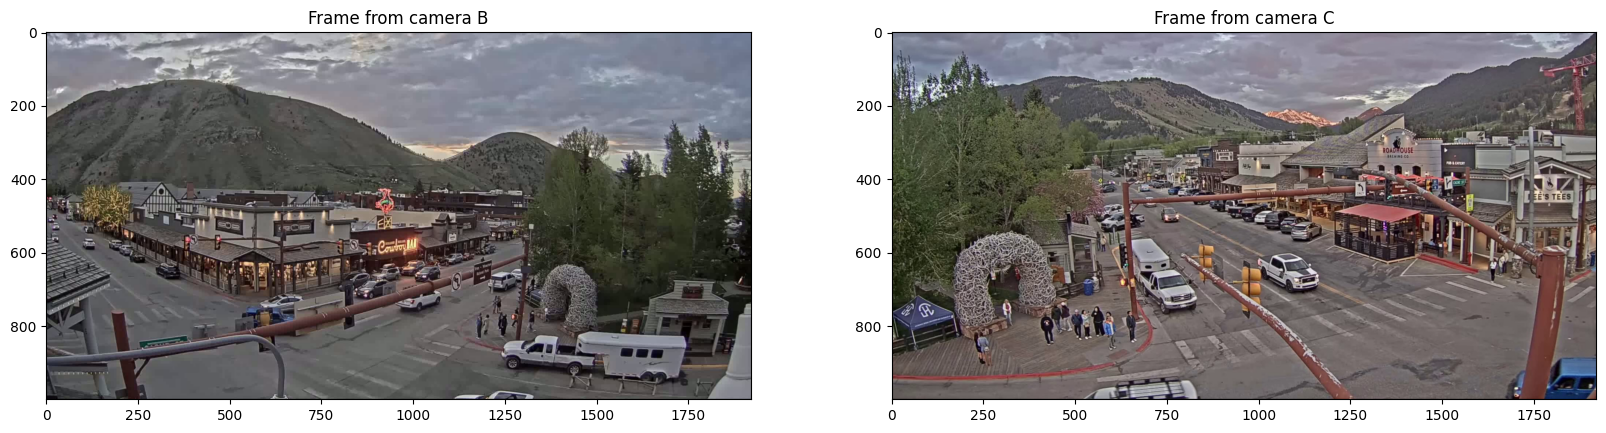

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].set_title("Frame from camera B")
axs[0].imshow(b)
axs[1].set_title("Frame from camera C")
axs[1].imshow(c)
plt.show()

In [9]:
cv.imwrite("correspondences/camera_b.png", cv.cvtColor(b, cv.COLOR_RGB2BGR))
cv.imwrite("correspondences/camera_c.png", cv.cvtColor(c, cv.COLOR_RGB2BGR))

True

In [6]:
coordinates_b = np.array(
[
    [1663, 763],
    [1435, 832],
    [1512, 816],
    [1315, 691],
    [1149, 844],
    [604, 772],
    [825, 782],
    [1096, 796],
    [1118, 816],
    [1094, 883],
    [967, 852],
    [804, 571],
    [1279, 861],
    [172, 657],
    [883, 578],
    [1341, 775],
    [180, 763],
    [1315, 564]
])
coordinates_c= np.array(
[
    [556, 559],
    [477, 746],
    [530, 672],
    [103, 746],
    [703, 849],
    [1459, 410],
    [1346, 446],
    [556, 938],
    [614, 907],
    [878, 825],
    [952, 895],
    [957, 657],
    [672, 777],
    [1680, 386],
    [837, 588],
    [218, 837],
    [1572, 367],
    [640, 408]
])

F, mask = cv.findFundamentalMat(coordinates_b, coordinates_c, cv.FM_8POINT)
print(F)
print(mask)

F_inv, mask= cv.findFundamentalMat(coordinates_c, coordinates_b, cv.FM_8POINT)
print(F_inv)
print(mask)

[[ 2.5012e-08  1.0474e-06 -0.00053031]
 [ 1.0537e-06  1.0097e-07 -0.00078029]
 [-0.00034678  -0.0015508           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 2.5012e-08  1.0537e-06 -0.00034678]
 [ 1.0474e-06  1.0097e-07  -0.0015508]
 [-0.00053031 -0.00078029           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'Camera C')

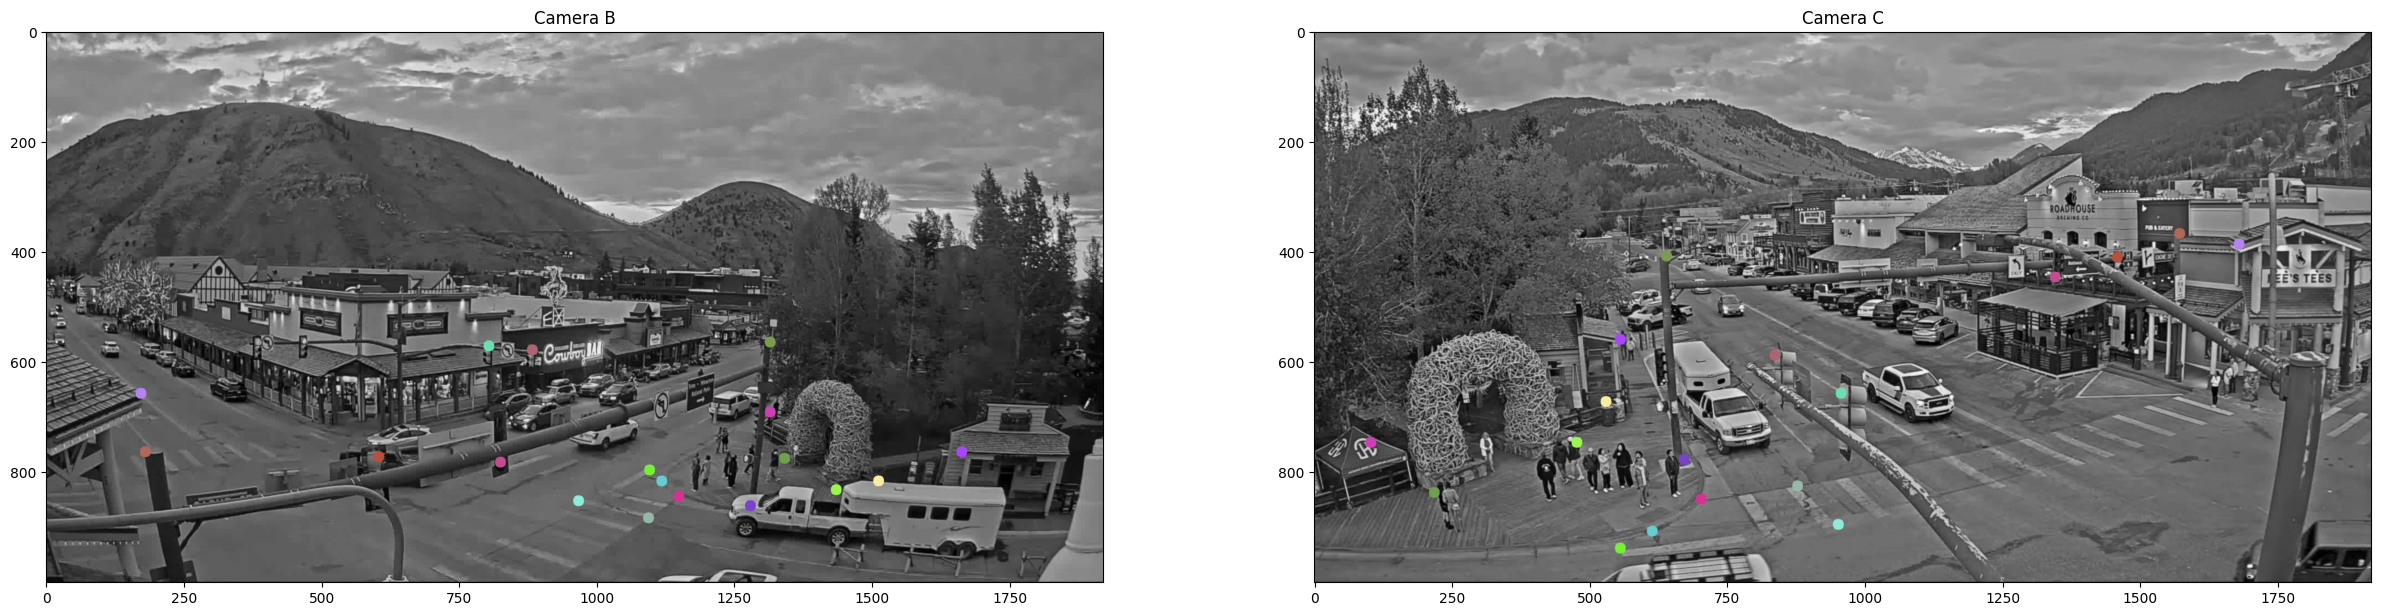

In [10]:
b_points = cv.cvtColor(cv.cvtColor(np.copy(b), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
c_points = cv.cvtColor(cv.cvtColor(np.copy(c), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

colors = [np.random.randint([100, 30, 50], [255, 255, 255]).tolist() for _ in range(len(coordinates_b))]
for i in range(len(coordinates_b)):
    cv.circle(b_points, tuple(coordinates_b[i]), 10, colors[i], -1)
    cv.circle(c_points, tuple(coordinates_c[i]), 10, colors[i], -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(b_points)
ax[0].set_title("Camera B")
ax[1].imshow(c_points)
ax[1].set_title("Camera C")

0.8429920077323914
0.5697932541370392
3.9500858187675476
0.9776262044906616
1.082897310429651
18.621664710144085
21.101694703102112
6.808023739339336
2.2338438769485878
4.076207339763641
3.3624132871627808
10.533717155456543
1.03562992811203
21.053547024726868
5.942469954490662
4.068520963191986
7.567811608314514
1.096973484574168


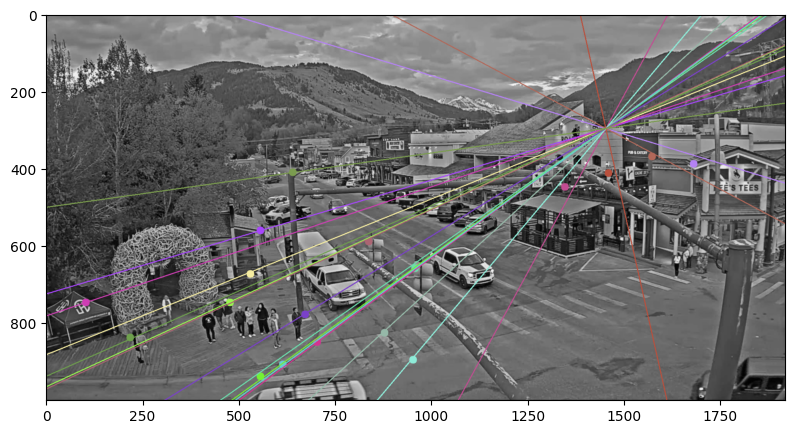

In [11]:
epilines = cv.computeCorrespondEpilines(coordinates_b.reshape(-1, 1, 2), 1, F)

for i, line in enumerate(epilines):
    draw_epiline(line[0], c_points, color=colors[i])
    print(distance_point_to_line(coordinates_c[i], line[0]))

plt.figure(figsize=(10, 5))
plt.imshow(c_points)

0.9736548364162445
0.4762948155403137
3.812732458114624
0.48431226517631204
0.7537227272987366
45.46816784143448
40.41152375936508
3.5061423778533936
1.2947794198989868
3.30041766166687
2.191975712776184
2.643646538257599
0.874133288860321
43.743255615234375
2.006346970796585
2.3420198559761047
28.46958577632904
0.8681273385882378


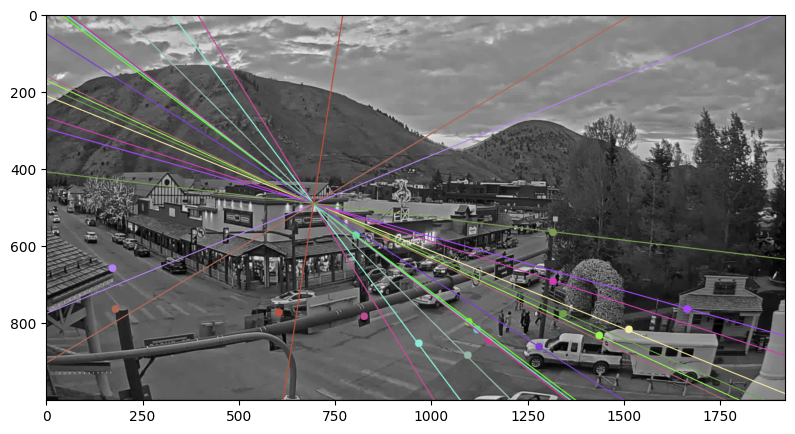

In [12]:
epilines = cv.computeCorrespondEpilines(coordinates_c.reshape(-1, 1, 2), 1, F_inv)

for i, line in enumerate(epilines):
    draw_epiline(line[0], b_points, color=colors[i])
    print(distance_point_to_line(coordinates_b[i], line[0]))

plt.figure(figsize=(10, 5))
plt.imshow(b_points)

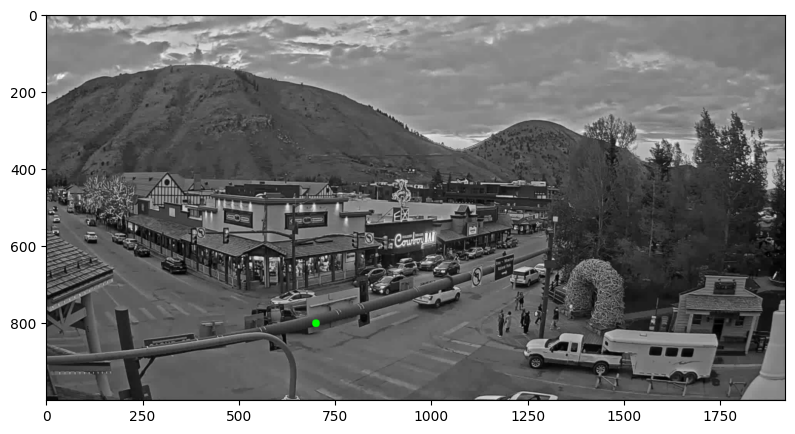

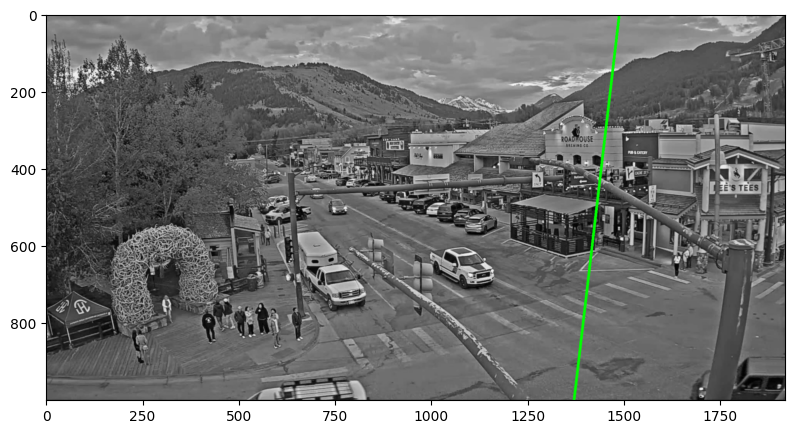

In [17]:
b_copy = cv.cvtColor(cv.cvtColor(np.copy(b), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
c_copy = cv.cvtColor(cv.cvtColor(np.copy(c), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

point = [700, 800]
cv.circle(b_copy, tuple(point), 10, [0, 255, 0], -1)

epiline = cv.computeCorrespondEpilines(np.array([point]).reshape(-1, 1, 2), 1, F)[0][0]
x0, y0 = map(int, [0, -epiline[2] / epiline[1]])
x1, y1 = map(int, [c.shape[1], -(epiline[2] + epiline[0] * c.shape[1]) / epiline[1]])
cv.line(c_copy, (x0, y0), (x1, y1), [0, 255, 0], 5)


plt.figure(figsize=(10, 5))
plt.imshow(b_copy)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(c_copy)
plt.show()

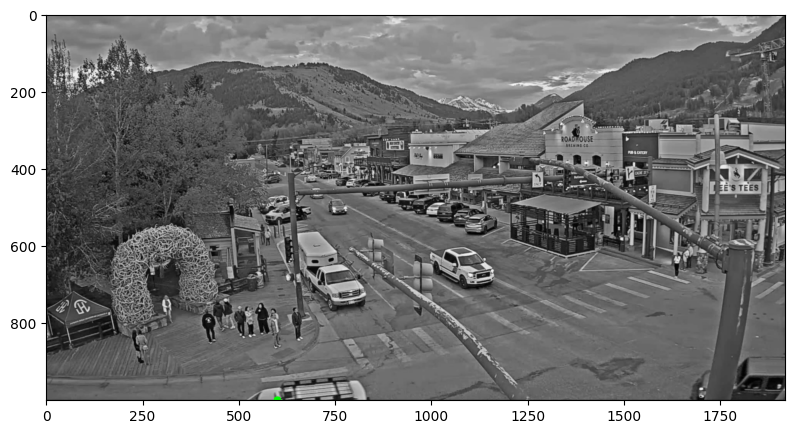

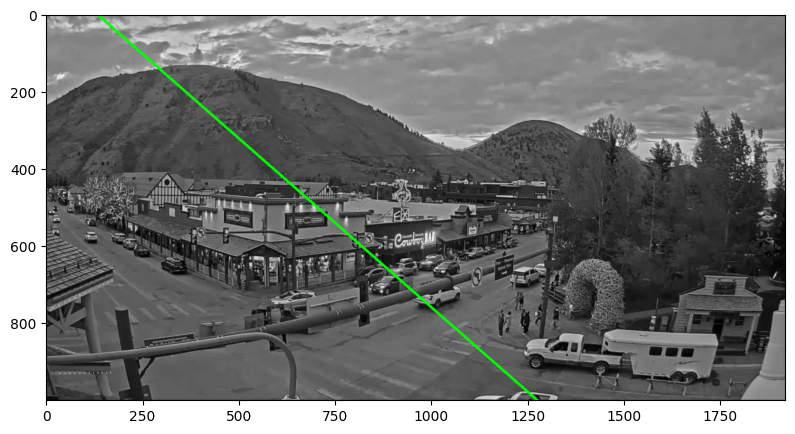

In [18]:
c_copy = cv.cvtColor(cv.cvtColor(np.copy(c), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
a_copy = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

point = [600, 1000]
cv.circle(c_copy, tuple(point), 10, [0, 255, 0], -1)

epiline = cv.computeCorrespondEpilines(np.array([point]).reshape(-1, 1, 2), 1, F_inv)[0][0]
x0, y0 = map(int, [0, -epiline[2] / epiline[1]])
x1, y1 = map(int, [c.shape[1], -(epiline[2] + epiline[0] * c.shape[1]) / epiline[1]])
cv.line(a_copy, (x0, y0), (x1, y1), [0, 255, 0], 5)


plt.figure(figsize=(10, 5))
plt.imshow(c_copy)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(a_copy)
plt.show()

In [19]:
np.save("fundamental_matrices/BC.npy", F)
np.save("fundamental_matrices/CB.npy", F_inv)